e =  (r_a - r_p)/(r_a + r_p)
e_value=  0.0843440680329012
r_a/2 + r_p/2
a_value = 7173.00000000000
2*pi*((r_a/2 + r_p/2)**3/mu)**0.5
6045.92099065776 seconds
1.67942249740493 hours
-27.7847483619127

theta solutions: [6.28318530717959 - acos(-(r*r_a + r*r_p - 2.0*r_a*r_p)/(r*(r_a - r_p))), acos((-r*r_a - r*r_p + 2.0*r_a*r_p)/(r*(r_a - r_p)))]
theta solution1: 180.0 + 148.379949453651*I
theta solution2: 180.0 - 148.379949453651*I
orbit_equation r - (mu*(r_a/2 + r_p/2)*(-(r_a - r_p)**2/(r_a + r_p)**2 + 1))**1.0/(mu*((r_a - r_p)*cos(theta)/(r_a + r_p) + 1))
v_r val: 8.93201736503308e-23 + 4.18062385449651*I km/s
v_theta val: 3.25317859759474 + 1.37511228130352e-25*I km/s
v_periapsis val: 8.11214358578056 km/s
v_apoapsis val: 6.85016187598441 km/s


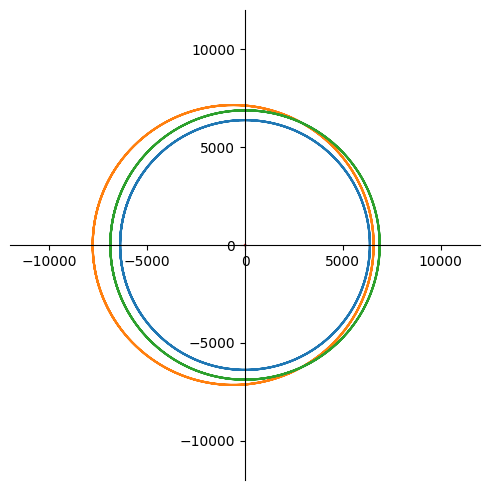

In [6]:
import sympy
from sympy import *
import sys

# Curtis problem 2.20


# Defining Parameters
# symbols
#
r_p = Symbol('r_p')                 # perigee radius in km
r_a = Symbol('r_a')                 # apogee radius in km
mu = Symbol('mu')                   # Earth geocentric gravity constant 3.986 x 10^5 km^3/s^2
r_earth = Symbol( 'r_earth')        # radius of the earth
r = Symbol('r')                     # orbital radius
theta = Symbol('theta')             # True anomaly, radians
h_interest = Symbol('h_interest')   # interested altitude
x_lim_plot = Symbol('x_lim_plot')   # interested altitude
#
# values
#
values = [
            ( r_p, 190+r_earth ) , 
            ( r_a, 1400 + r_earth) ,
            ( mu, 3.986*10**5),
            ( r_earth, 6378),
            ( h_interest, 10000)
]

#
# 2.20 Part (a): The eccentricity of the orbit, e = ?
#

e = (r_a - r_p) / (r_a + r_p)

print('e = ',e)

# values for polaris dawn mission

# sys.exit(0)

e_value = e.subs(values).evalf()


print('e_value= ', e_value)

#
# 2.20 Part (b): The Semi-major axis
#

a = (r_a + r_p)/2

print(a)

a_value = a.subs(values).evalf()

print('a_value =', a_value)

#
# 2.20 part (c): The period of the orbit
#

T = 2*pi*((a**3)/mu)**(1/2)

print(T)

T_value = T.subs(values).evalf()

print(T_value, 'seconds',)

print(T_value/3600, 'hours',)

#
# 2.20 part (d): The Specific energy of the orbit epsilon 
#

# formula for angular momentum h
h = (a*mu*(1-e**2))**(1/2)

epsilon = (1/2)*(mu**2)*((e**2)-1)/(h**2)

epsilon_values = epsilon.subs(values).evalf()

print(epsilon_values)

#
# 2.20 part (e): The true anomaly (degrees) at which the altitude is 10,000 km
#

# r = 

orbit_equation = r - h**2 / mu / (1 + e*cos(theta))

theta_solutions = solve(orbit_equation, theta)

theta_sol_01_degrees = (theta_solutions[0]*180/pi).subs(r, r_earth + h_interest).subs(values).evalf()
theta_sol_02_degrees = (theta_solutions[1]*180/pi).subs(r, r_earth + h_interest).subs(values).evalf()

print()
print('theta solutions:',theta_solutions)
print('theta solution1:',theta_sol_01_degrees)
print('theta solution2:',theta_sol_02_degrees)

print('orbit_equation', orbit_equation)


#
# 2.20 Part f: v_r = ? and v_theta = ?
#

v_r = mu/h*e*sin(theta_sol_02_degrees*pi/180)
v_r_value = v_r.subs(values).evalf()

v_theta = mu/h*(1 + e*cos(theta_sol_02_degrees*pi/180))
v_theta_value = v_theta.subs(values).evalf()


print('v_r val:',       v_r_value,      "km/s")
print('v_theta val:',   v_theta_value,  "km/s")

v_periapsis = h/r_p
v_p_values = v_periapsis.subs(values)


v_apoapsis = h/r_a
v_a_values = v_apoapsis.subs(values)

print('v_periapsis val:',   v_p_values,  "km/s")
print('v_apoapsis val:',    v_a_values,  "km/s")

#
# plot orbit
#
r_orbit_value = ( h**2 / mu / (1 + e_value * cos(theta))).subs(values).evalf()

plot_parametric( ((r_earth * cos(theta)).subs(values), (r_earth * sin(theta)).subs(values)), 
                ((r_orbit_value * cos(theta)).subs(values), (r_orbit_value * sin(theta)).subs(values)), 
                (((500+r_earth) * cos(theta)).subs(values), ((500+r_earth) * sin(theta)).subs(values)), 
                (theta, theta, 2 * pi), 
                size = (5,5), 
                xlim = (-12000,12000),
                ylim = (-12000,12000))


In [9]:
%reset -f
import sympy
from sympy import *
import sys
#
# Problem 2.29 Curtis
# Given 2 altitudes and corresponding anomalies
e = Symbol( 'e') # first altitude
h_1 = Symbol( 'h_1') # first altitude
h_2 = Symbol( 'h_2') # second altitude
r_1 = Symbol( 'r_1') # first radius
r_2 = Symbol( 'r_2') # second radius
hn = Symbol( 'hn') # second radius
mu = Symbol('mu')                   # Earth geocentric gravity constant 3.986 x 10^5 km^3/s^2
r_earth = Symbol( 'r_earth')        # radius of the earth
# r = Symbol('r')                     # orbital radius
# theta = Symbol('theta')             # True anomaly, radians
# h_interest = Symbol('h_interest')   # interested altitude

theta_1_degrees = Symbol( 'theta_1_degrees')
theta_2_degrees = Symbol( 'theta_2_degrees')

#
# values
#

values = [
    (r_1                ,h_1 + r_earth ) ,
    (r_2                ,h_2 + r_earth ) ,
    (h_1                ,1000 ) ,
    (h_2                ,2000 ) ,
    (theta_1_degrees    ,40 ) ,
    (theta_2_degrees    ,150 ) ,
    (mu                 ,3.986*10**5 ) ,
    (r_earth            ,6378 )
]


# r_1 = h_1 + r_earth
# r_2 = h_2 + r_earth

orbit_eq_01 = r_1 - hn**2 / mu  /(1 + e * cos( theta_1_degrees * pi / 180))
orbit_eq_02 = r_2 - hn**2 / mu  /(1 + e * cos( theta_2_degrees * pi / 180))

print(orbit_eq_01)

sols = solve([orbit_eq_01.subs(values),orbit_eq_02.subs(values)], [hn,e], dict = True)

print(sols)

h_value = sols[1][hn]
e_value = sols[1][e]

print()
print('h_vals',h_value)
print('e_vals',e_value)

#
# b perigee altitude
#
r_p = h_value**2 / mu / (1 + e_value)

h_p = r_p - r_earth

print( 'h_p = ', h_p.subs(values).evalf())

#
# Part (c): semimajor axis?
#

a_value = h_value**2 / mu / (1 - e_value**2)

print('a_value', a_value.subs(values).evalf())

-hn**2/(mu*(e*cos(pi*theta_1_degrees/180) + 1)) + r_1
[{e: 0.0774747163662195, hn: -55815.8468938863}, {e: 0.0774747163662195, hn: 55815.8468938863}]

h_vals 55815.8468938863
e_vals 0.0774747163662195
h_p =  875.884813883885
a_value 7863.07426210716


In [5]:
%reset -f
import sympy
from sympy import *
import sys

#
# arctan function
#

v_r =       Symbol('v_r')
v_theta =   Symbol( 'v_theta')
gamma =     Symbol('gamma')

values = [
    (v_r,-1) ,
    (v_theta, -2)
]

gamma_value_01 = ( atan( v_r/ v_theta)*180/pi).subs(values).evalf()

gamma_value_02 = ( atan2( v_r, v_theta)*180/pi).subs(values).evalf()


print('gamma_value_01 = ', gamma_value_01)
print('gamma_value_02 = ', gamma_value_02)


gamma_value_01 =  26.5650511770780
gamma_value_02 =  -153.434948822922
